# **ESCALADO DE VARIABLES (TOWARDS DATASCIENCE)**

**¿ Por qué necesitamos escalar ?**

  + El algoritmo de ML solo ve el número: si hay una gran diferencia en el rango, digamos que una variable esta en miles y otra variable esta en decenas, el algoritmo hace la suposición subyacente de que los números de mayor rango tienen algun tipo de superioridad. Entonces, este número es más significativo y empieza a jugar un papel más decisivo mientras se entrena el modelo.

  + El algoritmo de ML funciona con números y no sabe qué representa este número. Un peso de 10g y un precio de 10 dolares representan dos cosas distintas, lo cual es obvio para los humanos pero no para un modelo que solo analiza números, ya que los trata por igual.

  + Otra razón para escalar variables es que algunos algormitmos como el DESCENSO DE GRADIENTE DE UNA RED NEURONAL converga mucho más rápido con el escalado de variables que sin el.

  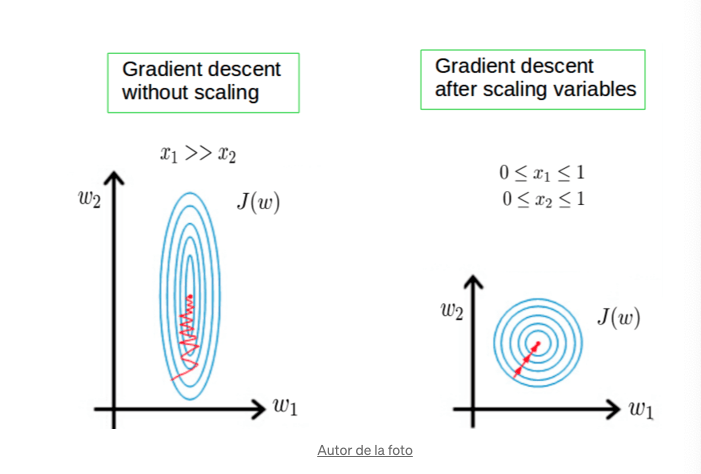

In [ ]:
# LIBRARIES

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.DataFrame({'WEIGHT': [15, 18, 12,10], 
                   'PRICE': [1,3,2,5 ]}, 
                   index = ['Orange','Apple','Banana','Grape']) 
df

,WEIGHT,PRICE
Orange,15,1
Apple,18,3
Banana,12,2
Grape,10,5


## **SCALE - NORMALIZACIÓN**

Transformar las variables escalando cada variable en un rango determinado. Este scaler reduce los datos dentro del rango [-1,1] si tiene valores negativos. Pero se puden establecer otros rangos [0,1], [0,5] o [-1,1]

Este scaler responde bien si la SD es pequeña y cuando una distribución NO es gaussiana. Es sensible a los valores atípicos.

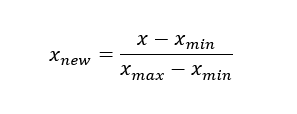

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1 = pd.DataFrame(scaler.fit_transform(df), columns = ['WEIGHT', 'PRICE'], index = ['Orange','Apple','Banana','Grape'])
df1

,WEIGHT,PRICE
Orange,0.625,0.00
Apple,1.000,0.50
Banana,0.250,0.25
Grape,0.000,1.00


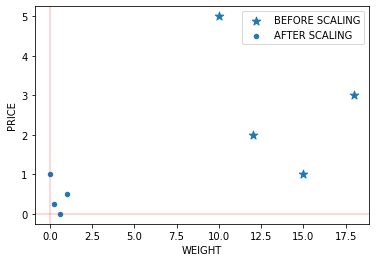

In [ ]:
# Gráfico sin normalizacion
ax = df.plot.scatter(x = 'WEIGHT', y = 'PRICE', marker = '*', s = 80, label = 'BEFORE SCALING');

# Gráfico con normalizacion
df1.plot.scatter(x = 'WEIGHT', y = 'PRICE', marker = 'o', label = 'AFTER SCALING', ax = ax)

# Creamos una linea sobre la X=0 y Y=0
plt.axhline(0, color = 'red', alpha = 0.2)
plt.axvline(0, color = 'red', alpha = 0.2)
plt.show()

## **SCALER - ESTANDARIZACION**

El scaler estandarizado asume que los datso se distribuyen normalmente dentro de cada variable y los escala de manera que la distribución centra con media 0 y SD 1.

Si los datos no se distribuyen de forma normal, este no es el mejor escalador para usar.

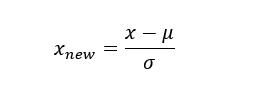

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df2 = pd.DataFrame(scaler.fit_transform(df), columns = ['WEIGHT', 'PRICE'], index = ['Orange','Apple','Banana','Grape'])
df2

,WEIGHT,PRICE
Orange,0.412393,-1.183216
Apple,1.402136,0.169031
Banana,-0.577350,-0.507093
Grape,-1.237179,1.521278


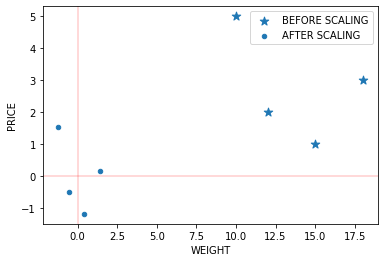

In [ ]:
# Gráfico sin estandarizacion
ax = df.plot.scatter(x = 'WEIGHT', y = 'PRICE', marker = '*', s = 80, label = 'BEFORE SCALING');

# Gráfico con estandarizacion
df2.plot.scatter(x = 'WEIGHT', y = 'PRICE', marker = 'o', label = 'AFTER SCALING', ax = ax)

# Creamos una linea sobre la X=0 y Y=0
plt.axhline(0, color = 'red', alpha = 0.2)
plt.axvline(0, color = 'red', alpha = 0.2)
plt.show()

## **SCALER - MAXIMOS ABSOLUTOS**

Scalar **cada variable por su valor máximo absoluto**. Este estimador escala y traduce cada variable individualmente de modo que el valor absoluto máximo de cada variable en en conjunto de entrenamiento sea 1. No cambia los datos.

En datos solo positivos, se comporta similar al scaler- normalizacion, **sufre la presencia de valores atípicos**

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

df4 = pd.DataFrame(scaler.fit_transform(df), columns =['WEIGHT','PRICE'], index = ['Orange','Apple','Banana' ,'Grape'])
df4

,WEIGHT,PRICE
Orange,0.833333,0.2
Apple,1.000000,0.6
Banana,0.666667,0.4
Grape,0.555556,1.0


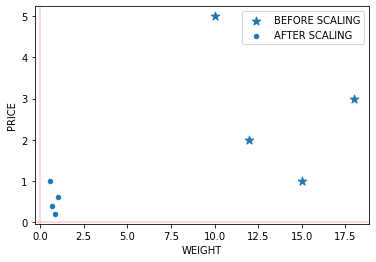

In [ ]:
# Gráfico sin estandarizacion
ax = df.plot.scatter(x = 'WEIGHT', y = 'PRICE', marker = '*', s = 80, label = 'BEFORE SCALING');

# Gráfico con estandarizacion
df4.plot.scatter(x = 'WEIGHT', y = 'PRICE', marker = 'o', label = 'AFTER SCALING', ax = ax)

# Creamos una linea sobre la X=0 y Y=0
plt.axhline(0, color = 'red', alpha = 0.2)
plt.axvline(0, color = 'red', alpha = 0.2)
plt.show()

## **SCALER - ROBUSTO**

Como el propio nombre indica este estimador es **resistente a los valores atípicos**. Cuando nuestros datos contienen muchos valores atípicos, el escalado usando la media y la SD de los datos no funciona bien.

Este escalador elimina la mediana y escala los datos de acuerdo con el rango interquartil (Q3-Q1). Tenga en cuenta que nos valores atípicos estan presentes en los datos transformados. Si se desea eliminarlos, se requiere una transformación **no lineal**

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df5 = pd.DataFrame(scaler.fit_transform(df),columns=['WEIGHT','PRICE'],index = ['Orange','Apple','Banana','Grape'])
df5


,WEIGHT,PRICE
Orange,0.352941,-0.857143
Apple,1.058824,0.285714
Banana,-0.352941,-0.285714
Grape,-0.823529,1.428571


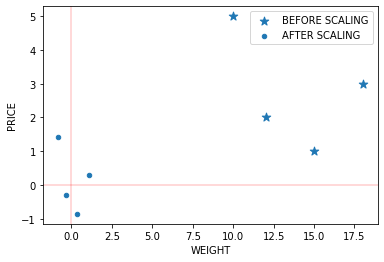

In [ ]:
# Gráfico sin estandarizacion
ax = df.plot.scatter(x = 'WEIGHT', y = 'PRICE', marker = '*', s = 80, label = 'BEFORE SCALING');

# Gráfico con estandarizacion
df5.plot.scatter(x = 'WEIGHT', y = 'PRICE', marker = 'o', label = 'AFTER SCALING', ax = ax)

# Creamos una linea sobre la X=0 y Y=0
plt.axhline(0, color = 'red', alpha = 0.2)
plt.axvline(0, color = 'red', alpha = 0.2)
plt.show()

**INTRODUZCAMOS UN OUTLIER PARA VER EL EFECTO DE APLICAR EL ESTIMADOR DE ESCALADO ESTANDARIZADO VS ROBUSTO**

In [ ]:
df_outlier = pd.DataFrame({'WEIGHT': [15, 18, 12,10,50],'PRICE': [1,3,2,5,20]},index = ['Orange','Apple','Banana','Grape','Jackfruit'])
df_outlier

,WEIGHT,PRICE
Orange,15,1
Apple,18,3
Banana,12,2
Grape,10,5
Jackfruit,50,20


In [ ]:
# Con estimador estandarizado

scaler = StandardScaler()

df_estimador_estandarizado = pd.DataFrame(scaler.fit_transform(df_outlier), columns=['WEIGHT','PRICE'],index = ['Orange','Apple','Banana','Grape','Jackfruit'])
df_estimador_estandarizado

,WEIGHT,PRICE
Orange,-0.406745,-0.740143
Apple,-0.203372,-0.455473
Banana,-0.610117,-0.597808
Grape,-0.745698,-0.170802
Jackfruit,1.965932,1.964226


In [ ]:
# Con estimador robusto

scaler = RobustScaler()

df_estimador_robusto = pd.DataFrame(scaler.fit_transform(df_outlier),columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
df_estimador_robusto

,WEIGHT,PRICE
Orange,0.000000,-0.666667
Apple,0.500000,0.000000
Banana,-0.500000,-0.333333
Grape,-0.833333,0.666667
Jackfruit,5.833333,5.666667


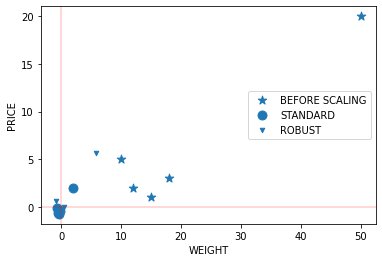

In [ ]:
# Gráfico sin estandarizacion
ax = df_outlier.plot.scatter(x = 'WEIGHT', y = 'PRICE', marker = '*', s = 80, label = 'BEFORE SCALING');

# Gráfico con estandarizacion
df_estimador_estandarizado.plot.scatter(x='WEIGHT', y='PRICE', marker = 'o',s=80, label='STANDARD', ax = ax)
df_estimador_robusto.plot.scatter(x = 'WEIGHT', y = 'PRICE', marker = 'v', label = 'ROBUST', ax = ax)

# Creamos una linea sobre la X=0 y Y=0
plt.axhline(0, color = 'red', alpha = 0.2)
plt.axvline(0, color = 'red', alpha = 0.2)
plt.show()